In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException 
from selenium.common.exceptions import TimeoutException
import time
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
driver = webdriver.Firefox()
#last month
driver.get("https://inspections.myhealthdepartment.com/sacramento")

wait = WebDriverWait(driver, 5)

date_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#filterdate')))
date_button.click()

for i in range(10):
    prev_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[4]/div[2]/div[1]/table/thead/tr[1]/th[1]')))
    prev_button.click()

begin_date = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[2]/div[1]/table/tbody/tr[1]/td[4]")))
begin_date.click()

for i in range(8):
    next_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[4]/div[3]/div[1]/table/thead/tr[1]/th[3]')))
    next_button.click()

end_date = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[3]/div[1]/table/tbody/tr[6]/td[1]")))
end_date.click()

apply = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[4]/button[2]")))
apply.click()

while True:
    try:
        load_more_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div[9]/div/button')))
        load_more_button.click()
        time.sleep(1)
    except TimeoutException:
        print('Timeout Exception, Stopping')
        break

view_buttons = driver.find_elements(By.XPATH, '//a[contains(text(), "View")]')

links = [button.get_attribute('href') for button in view_buttons]

driver.quit()

Timeout Exception, Stopping


In [124]:
import pickle

with open("Data/Health2.pkl", "ab") as f:
    pickle.dump(links, f)

In [87]:
import pickle
with open("Data/Health.pkl", "rb") as f:
    links = pickle.load(f)
len(links)

2268

In [3]:
import json

with open("Data/combined_results.json", 'r') as f:
    health_codes = json.load(f)

with open("Data/yelp_cleaned.json", 'r') as f:
    yelp_reviews = json.load(f)

In [8]:
health_codes
columns = ["name", "address", "health codes", "date", "url"]

df_health = pd.DataFrame(health_codes, columns=columns)

In [13]:
df_health

df_health["key"] = df_health.apply(lambda row: row['address'].split()[0][:4] + "-" + row['name'][:3].lower(), axis=1)

In [15]:
df_health.to_csv("Data/healthdf.csv")

In [22]:
yelp_reviews

{'4701-tha': {'alias': 'thai-the-house-of-authentic-ingredients-sacramento',
  'name': 'THAI - The House Of Authentic Ingredients',
  'review_count': 571,
  'categories': ['Thai', 'Bars'],
  'display_address': ['4701 H St', 'Sacramento, CA 95819'],
  'addy_one': '4701 H St',
  'addy_two': None,
  'addy_three': None,
  'city': 'Sacramento',
  'zip_code': '95819',
  'phone': '+19169429008'},
 '4601-vib': {'alias': 'vibe-health-bar-sacramento-2',
  'name': 'Vibe Health Bar',
  'review_count': 322,
  'categories': ['Juice Bars & Smoothies', 'Wraps', 'Sandwiches'],
  'display_address': ['4601 H St', 'Sacramento, CA 95819'],
  'addy_one': '4601 H St',
  'addy_two': '',
  'addy_three': '',
  'city': 'Sacramento',
  'zip_code': '95819',
  'phone': '+19169705102'},
 '160-ber': {'alias': 'bertha-henschel-park-sacramento',
  'name': 'Bertha Henschel Park',
  'review_count': 17,
  'categories': ['Parks', 'Playgrounds'],
  'display_address': ['160 45th St', 'Sacramento, CA 95819'],
  'addy_one': '1

In [25]:
key_list = []
for key in yelp_reviews.keys():
    key_list.append(key)

In [28]:
yelp_reviews[key_list[0]]
key_list[0]

'4701-tha'

In [31]:
data_list = [{'key': key, **value} for key, value in yelp_reviews.items()]

df_yelp = pd.DataFrame(data_list)

In [36]:
df_yelp.to_csv("Data/yelpdf.csv")

In [41]:
df_health

,name,address,health codes,date,url,key
0,SHADY LADY,"1409 R St Ste 101 Sacramento, CA 95811-6672","[4, 7, 14a, 30a, 36, 43]","March 15, 2024",https://inspections.myhealthdepartment.com/sac...,1409-sha
1,SEE'S CANDIES SHOP SF 75,"3651-3 Truxel Rd Ste 3 Natomas, CA 95834",[],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3651-see
2,HOMEGOODS,"3691 Truxel Rd Sacramento, CA 95834-3604",[],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3691-hom
3,BREW TO GO,"2913 Auburn Blvd Sacramento, CA 95821","[14a, 15, 33, 35, 47a, 48]","March 15, 2024",https://inspections.myhealthdepartment.com/sac...,2913-bre
4,BRICKLAND BISTRO,"3301 Folsom Blvd Sacramento, CA 95816-5329",[7],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3301-bri
...,...,...,...,...,...,...
7941,SAFEWAY FUEL CENTER #1895,"5400 Dewey Dr Fair Oaks, CA 95628-3138",[21],"March 1, 2023",https://inspections.myhealthdepartment.com/sac...,5400-saf
7942,SABA POULTRY 3,"8612 Younger Creek Dr Sacramento, CA 95828-1022","[6, 23]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,8612-sab
7943,MAKISU SUSHI,"2338 Fair Oaks Blvd Sacramento, CA 95825-4709","[23, 44e]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,2338-mak
7944,SHOGUN SUSHI,"7330 Fair Oaks Blvd Ste 10 Carmichael, CA 956...","[1b, 1c, 33, 35]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,7330-sho


In [48]:
df_health.dtypes
df_merge = df_yelp.merge(df_health, on ='key', how='inner')

In [50]:
df_merge.to_csv("Data/merged.csv")

In [3]:
df_yelp_v2 = pd.read_csv("Data/yelp_v2.csv")
df_yelp_v2.rename(columns={df_yelp_v2.columns[0]:'key'}, inplace=True)

In [5]:
df_yelp_v2.to_csv("Data/yelp_v2.csv")
df_health = pd.read_csv("Data/")

NameError: name 'health_codes' is not defined

In [4]:
df_merge_v2 = df_yelp_v2.merge(df_health, on='key')
df_merge_v2.to_csv("Data/merged.csv")

NameError: name 'df_health' is not defined

In [6]:
df_merge_v2 = pd.read_csv("Data/merged.csv")

In [7]:
df_merge_v2[df_merge_v2['name_x'] == 'Panda Express'].head(2)

,Unnamed: 0,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
148,148,1431-pan,panda-express-sacramento-8,Panda Express,2.4,$$,97,"['Chinese', 'Fast Food']",38.592060,-121.415946,"['1431 Howe Ave. Suite #100', 'Sacramento, C...",Sacramento,95825,1.916564e+10,"1431 Howe Ave Ste 100 Sacramento, CA 95825-3247","[['27', '33', '36']]","['November 30, 2023']",https://inspections.myhealthdepartment.com/sac...,3
216,216,1689-pan,panda-express-sacramento-33,Panda Express,1.8,$,21,"['Chinese', 'Fast Food']",38.601713,-121.428496,"['1689 Arden Way', 'Ste 2022', 'Sacramento, CA...",Sacramento,95815,1.916920e+10,1689 Arden Way Ste 1167 # Food Court FOOD COUR...,"[['27', '36']]","['September 5, 2023']",https://inspections.myhealthdepartment.com/sac...,2


In [76]:
agg_functions = {
    'alias': 'first',
    'name_x': 'first',
    'rating': 'first',
    'price': 'first',
    'review_count': 'first',
    'categories': 'first',
    'lat': 'first',
    'lon': 'first',
    'display_address': 'first',
    'city': 'first',
    'zip_code': 'first',
    'phone' : 'first',
    'address' : 'first',
    'health codes' : lambda x: x.tolist(),
    'date': lambda x: x.tolist(),  # Convert dates to list
    'url': 'first'
}

In [82]:
df_merge_v2[df_merge_v2['name_x'] == 'Panda Express'].head()

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url
69,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.561240,-121.424460,"['6000 J Street', 'Space #1005C', 'Sacramento,...",Sacramento,95819,1.916739e+10,"6000 J St Sacramento, CA 95819-2605","[7, 14a, 33, 36]","January 10, 2024",https://inspections.myhealthdepartment.com/sac...
70,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.561240,-121.424460,"['6000 J Street', 'Space #1005C', 'Sacramento,...",Sacramento,95819,1.916739e+10,"6000 J St Sacramento, CA 95819-2605","[21, 36, 49]","March 10, 2023",https://inspections.myhealthdepartment.com/sac...
81,5801-pan,panda-express-sacramento-21,Panda Express,2.2,$,106,"['Chinese', 'Fast Food']",38.557824,-121.435817,"['5801 Folsom Blvd', 'Sacramento, CA 95819']",Sacramento,95819,1.916455e+10,"5801 Folsom Blvd Ste 100 Sacramento, CA 95819...","[41, 42]","February 22, 2024",https://inspections.myhealthdepartment.com/sac...
82,5801-pan,panda-express-sacramento-21,Panda Express,2.2,$,106,"['Chinese', 'Fast Food']",38.557824,-121.435817,"['5801 Folsom Blvd', 'Sacramento, CA 95819']",Sacramento,95819,1.916455e+10,"5801 Folsom Blvd Ste 100 Sacramento, CA 95819...","[1c, 7, 21, 47c]","October 3, 2023",https://inspections.myhealthdepartment.com/sac...
310,1431-pan,panda-express-sacramento-8,Panda Express,2.4,$$,97,"['Chinese', 'Fast Food']",38.592060,-121.415946,"['1431 Howe Ave. Suite #100', 'Sacramento, C...",Sacramento,95825,1.916564e+10,"1431 Howe Ave Ste 100 Sacramento, CA 95825-3247","[27, 33, 36]","November 30, 2023",https://inspections.myhealthdepartment.com/sac...


In [84]:
check = df_merge_v2.groupby('key').agg(agg_functions).reset_index()
check.to_csv('Data/merged.csv')

In [9]:
check = pd.read_csv('Data/merged.csv')
check.drop(columns=['Unnamed: 0'], inplace=True)
check

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"['April 21, 2023']",https://inspections.myhealthdepartment.com/sac...,1
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","['November 8, 2023']",https://inspections.myhealthdepartment.com/sac...,5
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[['7', '14b', '27', '30a'], ['4', '6', '7', '1...","['January 3, 2024', 'April 13, 2023']",https://inspections.myhealthdepartment.com/sac...,12
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[['35', '36'], ['4', '35'], ['4', '35']]","['January 16, 2024', 'September 7, 2023', 'Sep...",https://inspections.myhealthdepartment.com/sac...,6
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[['1c', '42'], ['1c']]","['January 31, 2024', 'September 13, 2023']",https://inspections.myhealthdepartment.com/sac...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"['May 18, 2023']",https://inspections.myhealthdepartment.com/sac...,0
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[['1a', '4', '6', '14a', '23', '27', '30b', '3...","['December 8, 2023']",https://inspections.myhealthdepartment.com/sac...,15
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[['14a', '23', '33', '34', '35', '40', '41', '...","['November 29, 2023']",https://inspections.myhealthdepartment.com/sac...,8
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[['1b', '6', '29', '33', '34', '36', '39', '44...","['December 12, 2023']",https://inspections.myhealthdepartment.com/sac...,9


In [102]:
rows = []
for index, row in check.iterrows():
    for category in row['categories']:
        new_row = row.copy()
        new_row['categories'] = category
        rows.append(new_row)

cat_split = pd.DataFrame(rows)

In [111]:
cat_split = check.explode('categories')

In [107]:
row['categories']

"['Pizza', 'Chicken Wings', 'Fast Food']"

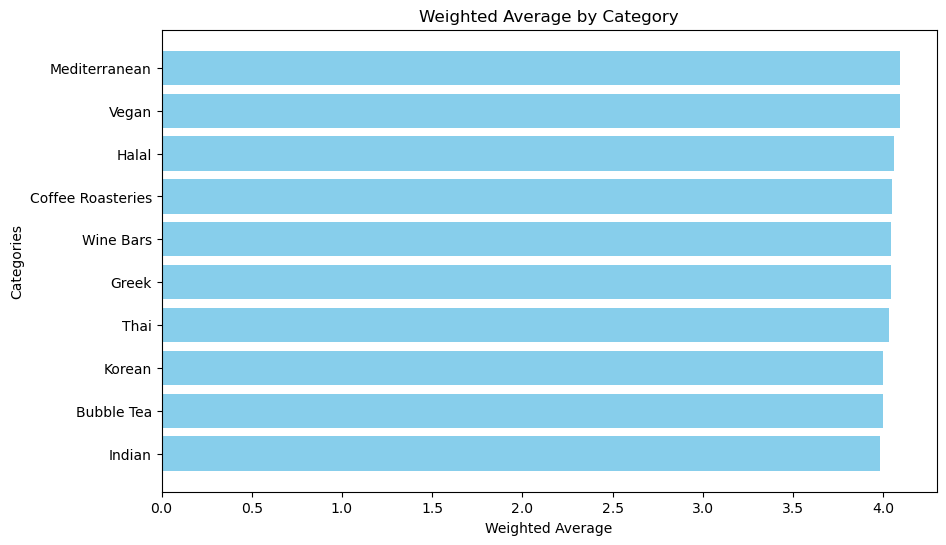

In [125]:
agg = {
    'rating': lambda x : x.mean(),
    'review_count' : lambda x : x.sum()
    
}
df = cat_split.groupby('categories').agg(agg).sort_values('rating',ascending = False)
avg_num_reviews = int(df['review_count'].mean())
avg_review = round(df['rating'].mean(),2)

df = df.assign(avg_review_numbers = avg_num_reviews)
df = df.assign(avg_review = avg_review)

df['weighted_average'] = df.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)

top_10_cat = df.sort_values('weighted_average', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(top_10_cat['categories'].apply(lambda x: ''.join(x)), top_10_cat['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average')
plt.ylabel('Categories')
plt.title('Weighted Average by Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/Category_graph.jpg',bbox_inches='tight')
plt.show()



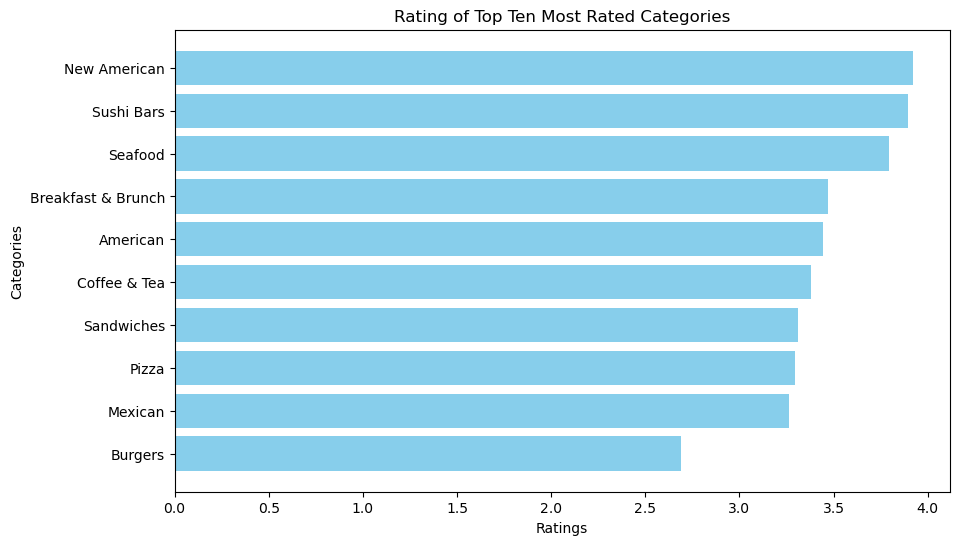

In [131]:
agg = {
    'rating': lambda x : x.mean(),
    'review_count' : lambda x : x.sum()
    
}
df = cat_split.groupby('categories').agg(agg).sort_values('review_count',ascending = False).head(10)

avg_num_reviews = int(df['review_count'].mean())
avg_review = round(df['rating'].mean(),2)

df = df.assign(avg_review_numbers = 50)
df = df.assign(avg_review = avg_review)

df['weighted_average'] = df.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)

top_10_cat = df.sort_values('rating', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(top_10_cat['categories'].apply(lambda x: ''.join(x)), top_10_cat['rating'], color='skyblue')
plt.xlabel('Ratings')
plt.ylabel('Categories')
plt.title('Rating of Top Ten Most Rated Categories')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/top_10_most_rated_Category_graph.jpg',bbox_inches='tight')
plt.show()


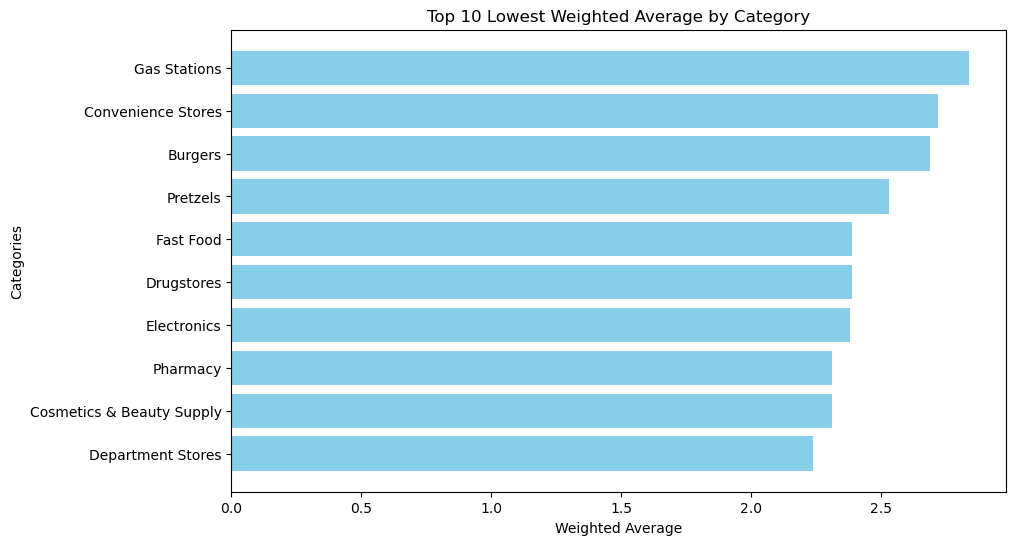

In [130]:
agg = {
    'rating': lambda x : x.mean(),
    'review_count' : lambda x : x.sum()
    
}
df = cat_split.groupby('categories').agg(agg).sort_values('rating',ascending = False)
avg_num_reviews = int(df['review_count'].mean())
avg_review = round(df['rating'].mean(),2)

df = df.assign(avg_review_numbers = 50)
df = df.assign(avg_review = 3)

df['weighted_average'] = df.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)


low_10_cat = df.sort_values('weighted_average', ascending=False).tail(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(low_10_cat['categories'].apply(lambda x: ''.join(x)), low_10_cat['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average')
plt.ylabel('Categories')
plt.title('Top 10 Lowest Weighted Average by Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/Lowest_Category_graph.jpg',bbox_inches='tight')
plt.show()

In [30]:
cat_10 = df.head(10)['categories']

cat_10_restaurant = check[check['categories'].apply(lambda x: any(cat in cat_10 for cat in x))]

In [37]:
filtered_check = check[check['categories'].apply(lambda x: any(set(cat) & set(top_cat) for top_cat in cat_10))]


In [11]:
check.columns

Index(['key', 'alias', 'name_x', 'rating', 'price', 'review_count',
       'categories', 'lat', 'lon', 'display_address', 'city', 'zip_code',
       'phone', 'address', 'health codes', 'date', 'url',
       'num_health_code_violations'],
      dtype='object')

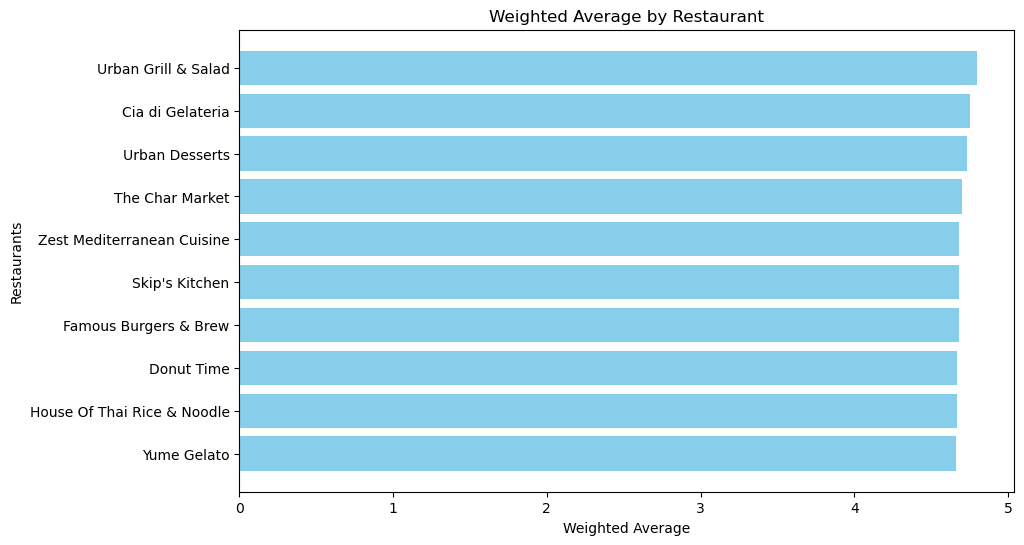

In [69]:
agg2 = {
    'rating' : lambda x : x.mean(),
    'review_count' : lambda x : x.sum(),
    'price' : 'first',
    'key' : 'first',
    'alias' : 'first',
    'lat' : 'first',
    'lon' : 'first',
    'zip_code' : 'first'
}
df2 = check.groupby('name_x').agg(agg2).sort_values('review_count', ascending=False)

avg_num_reviews2 = int(df['review_count'].mean())
avg_review2 = round(df['rating'].mean(),2)

df2 = df2.assign(avg_review_numbers = 50)
df2 = df2.assign(avg_review = 4)

df2['weighted_average'] = df2.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)

df2 = df2.sort_values('weighted_average', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(df2['name_x'], df2['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average')
plt.ylabel('Restaurants')
plt.title('Weighted Average by Restaurant')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/restaurant_rating_graph.jpg', bbox_inches='tight')
plt.show()




In [15]:
#Get number of health codes happening at store
import ast
def count_elements_in_lists(lst):
    return sum(len(sub_lst) for sub_lst in lst)
def convert_to_list(string_list):
    return ast.literal_eval(string_list)

# Apply the function to the 'string_lists' column
check['date'] = check['date'].apply(convert_to_list)
check['categories'] = check['categories'].apply(convert_to_list)
check['num_health_code_violations'] = check['health codes'].apply(count_elements_in_lists)
check

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"[April 21, 2023]",https://inspections.myhealthdepartment.com/sac...,7
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","[November 8, 2023]",https://inspections.myhealthdepartment.com/sac...,32
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[['7', '14b', '27', '30a'], ['4', '6', '7', '1...","[January 3, 2024, April 13, 2023]",https://inspections.myhealthdepartment.com/sac...,76
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[['35', '36'], ['4', '35'], ['4', '35']]","[January 16, 2024, September 7, 2023, Septembe...",https://inspections.myhealthdepartment.com/sac...,40
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[['1c', '42'], ['1c']]","[January 31, 2024, September 13, 2023]",https://inspections.myhealthdepartment.com/sac...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"[May 18, 2023]",https://inspections.myhealthdepartment.com/sac...,4
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[['1a', '4', '6', '14a', '23', '27', '30b', '3...","[December 8, 2023]",https://inspections.myhealthdepartment.com/sac...,93
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[['14a', '23', '33', '34', '35', '40', '41', '...","[November 29, 2023]",https://inspections.myhealthdepartment.com/sac...,51
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[['1b', '6', '29', '33', '34', '36', '39', '44...","[December 12, 2023]",https://inspections.myhealthdepartment.com/sac...,57


In [108]:
check['categories'] = check['categories'].apply(convert_to_list)

In [109]:
check.to_csv('Data/merged.csv')

In [39]:
check

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"[April 21, 2023]",https://inspections.myhealthdepartment.com/sac...,7
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","[November 8, 2023]",https://inspections.myhealthdepartment.com/sac...,32
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[['7', '14b', '27', '30a'], ['4', '6', '7', '1...","[January 3, 2024, April 13, 2023]",https://inspections.myhealthdepartment.com/sac...,76
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[['35', '36'], ['4', '35'], ['4', '35']]","[January 16, 2024, September 7, 2023, Septembe...",https://inspections.myhealthdepartment.com/sac...,40
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[['1c', '42'], ['1c']]","[January 31, 2024, September 13, 2023]",https://inspections.myhealthdepartment.com/sac...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"[May 18, 2023]",https://inspections.myhealthdepartment.com/sac...,4
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[['1a', '4', '6', '14a', '23', '27', '30b', '3...","[December 8, 2023]",https://inspections.myhealthdepartment.com/sac...,93
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[['14a', '23', '33', '34', '35', '40', '41', '...","[November 29, 2023]",https://inspections.myhealthdepartment.com/sac...,51
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[['1b', '6', '29', '33', '34', '36', '39', '44...","[December 12, 2023]",https://inspections.myhealthdepartment.com/sac...,57


In [65]:
agg3 = {
    'rating' : lambda x : x.mean(),
    'name_x' : 'first',
    'review_count' : lambda x : x.sum(),
    'price' : 'first',
    'num_health_code_violations' : 'first',
    'alias' : 'first',
    'lat' : 'first',
    'lon' : 'first',
    'zip_code' : 'first'
}

df3 = check.groupby('key').agg(agg3)

avg_num_reviews2 = int(df['review_count'].mean())
avg_review2 = round(df['rating'].mean(),2)

df3 = df3.assign(avg_review_numbers = 50)
df3 = df3.assign(avg_review = 4)

df3['weighted_average'] = df3.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)


In [61]:
df3

,rating,name_x,review_count,price,num_health_code_violations,alias,lat,lon,zip_code,avg_review_numbers,avg_review,weighted_average
key,,,,,,,,,,,,
1000-cra,2.4,Cracker Barrel Old Country Store,1213,$$,7,cracker-barrel-old-country-store-sacramento-2,38.583935,-121.414518,95825,500,4.52,3.02
1000-del,3.2,Delta Bar and Grill,102,$$,32,delta-bar-and-grill-sacramento,38.582643,-121.506647,95814,500,4.52,4.30
1000-ois,2.8,Oishii Sushi & Karaoke Bar,459,$$,76,oishii-sushi-and-karaoke-bar-sacramento,38.578810,-121.493760,95814,500,4.52,3.70
1000-the,3.6,The Boiling Crab,727,$$,40,the-boiling-crab-sacramento-4,38.578797,-121.493964,95814,500,4.52,3.97
1001-chi,2.4,Chipotle Mexican Grill,268,$,22,chipotle-mexican-grill-folsom,38.669456,-121.155625,95630,500,4.52,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...
9766-mel,4.1,Mel Dog's Cafe,211,$,4,mel-dogs-cafe-elk-grove,38.403080,-121.353690,95624,500,4.52,4.40
9783-bri,3.5,Brianna's Mexican Restaurant,111,$,93,briannas-mexican-restaurant-sacramento,38.562248,-121.332118,95827,500,4.52,4.33
9819-bro,3.4,Brookside Restaurant & Bar,165,$$,51,brookside-restaurant-and-bar-sacramento-3,38.575360,-121.328870,95827,500,4.52,4.24


In [66]:
df3.sort_values('weighted_average', ascending=False)

,rating,name_x,review_count,price,num_health_code_violations,alias,lat,lon,zip_code,avg_review_numbers,avg_review,weighted_average
key,,,,,,,,,,,,
3040-urb,4.9,Urban Grill & Salad,407,$$,26,urban-grill-and-salad-rancho-cordova-3,38.593556,-121.266113,95670,50,4,4.80
2784-cia,4.9,Cia di Gelateria,259,$$,4,cia-di-gelateria-folsom-2,38.656119,-121.119986,95630,50,4,4.75
2095-urb,4.9,Urban Desserts,218,$$,8,urban-desserts-gold-river,38.626755,-121.263570,95670,50,4,4.73
4717-the,4.9,The Char Market,176,$$,191,the-char-market-carmichael,38.628667,-121.354209,95608,50,4,4.70
4717-ski,4.7,Skip's Kitchen,1866,$$,55,skips-kitchen-carmichael,38.610435,-121.354401,95608,50,4,4.68
...,...,...,...,...,...,...,...,...,...,...,...,...
3541-win,1.9,Wingstop,515,$$,51,wingstop-sacramento-6,38.641426,-121.500992,95834,50,4,2.09
8637-bur,1.4,Burger King,161,$,37,burger-king-elk-grove-2,38.409374,-121.384147,95624,50,4,2.02
4242-mcd,1.3,McDonald's,150,$,43,mcdonalds-sacramento-12,38.644720,-121.456310,95838,50,4,1.98


In [67]:
import folium
from branca.colormap import LinearColormap
from folium.plugins import FloatImage

check_cp = df3.copy()
check_cp = df3[df3.lat.notna() & df3.lon.notna()]

m = folium.Map(location = [38.5816, -121.4944], zoom_start = 10)

color_map = LinearColormap(['red', 'yellow', 'green'], vmin=check_cp['rating'].min(), vmax=check_cp['rating'].max())

# Define circle size legend
size_legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; border: 1px solid grey; padding: 10px;">
    <h4>Circle Size Legend</h4>
    <p>Small Circle: 0-5 health code violations</p>
    <p>Medium Circle: 6-10 health code violations</p>
    <p>Large Circle: >10 health code violations</p>
</div>
'''

# Define color legend
color_legend_html = '''
<div style="position: fixed; bottom: 50px; right: 50px; z-index: 1000; background-color: white; border: 1px solid grey; padding: 10px;">
    <h4>Color Legend</h4>
    <p>Red: Low rating</p>
    <p>Yellow: Medium rating</p>
    <p>Green: High rating</p>
</div>
'''

cols = ["name_x", "lat", "lon", "weighted_average", "num_health_code_violations"]
for name, lat, lng, rating, health_code in check_cp[cols].itertuples(index = False):
    popup = folium.Popup(name, parse_html = True)
    circle = folium.Circle([float(lat), float(lng)], color=color_map(rating), fill_opacity=True, fill=True  , radius = health_code, popup = popup)
    m.add_child(circle)


# Add the size legend and color legend to the map
FloatImage(size_legend_html, bottom=50, left=50).add_to(m)
FloatImage(color_legend_html, bottom=50, right=50).add_to(m)

fig = folium.Figure(width = 900, height = 400)
fig.add_child(m)
fig.save('Images/map.html')